In [1]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from src.data.shapenet import ShapeNet

{'02691156': 'airplane', '02933112': 'cabinet', '02958343': 'car', '03001627': 'chair', '03636649': 'lamp', '04256520': 'sofa', '04379243': 'table', '04530566': 'watercraft'}


In [4]:
ShapeNet.class_name_mapping

{'02691156': 'airplane',
 '02933112': 'cabinet',
 '02958343': 'car',
 '03001627': 'chair',
 '03636649': 'lamp',
 '04256520': 'sofa',
 '04379243': 'table',
 '04530566': 'watercraft'}

In [5]:
dataset = ShapeNet('overfit','02691156' )

(1, 1)


In [6]:
data = dataset[0]

0
torch.Size([3, 224, 224])


In [7]:
import open3d as o3d
import torch
pcd = o3d.geometry.PointCloud()

data_pcl = torch.reshape(data['pcl'], ( 1024, 3)).numpy()
print(data_pcl.shape)

pcd.points = o3d.utility.Vector3dVector(data_pcl)
o3d.io.write_point_cloud("./data.ply", pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(1024, 3)


True

In [8]:
data['name']

'f7110ecac70994a83820d8f180caa23a'

In [9]:
import matplotlib.pyplot as plt

torch.Size([3, 224, 224])


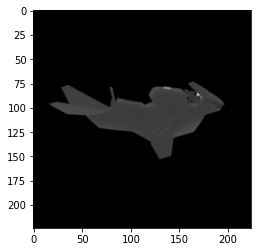

In [10]:
tensor_image = data['img_rgb']
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )

torch.Size([3, 224, 224])


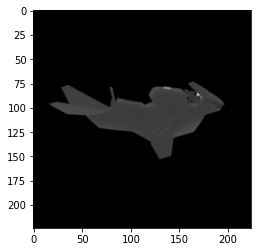

In [11]:
tensor_image = data['img_rgb'][:3,...]
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )


torch.Size([1, 224, 224])


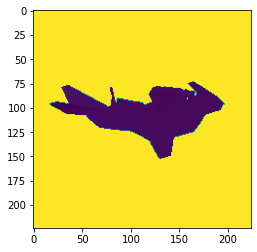

In [12]:
tensor_image = data['img_mask']
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )

In [13]:
data['pcl'].shape

torch.Size([3, 1024])

In [14]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [16]:
from src.network_architecture.recon_model import ReconstructionNet
from torchsummary import summary

cnn3d = ReconstructionNet()
print(summary(cnn3d, input_size=(3,224,224))) 


torch.Size([2, 256, 14, 14])
torch.Size([2, 50176])
before view:  torch.Size([2, 3072])
after view:  torch.Size([2, 3, 1024])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
              ReLU-2         [-1, 32, 112, 112]               0
            Conv2d-3           [-1, 64, 56, 56]          18,496
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 28, 28]          73,856
              ReLU-6          [-1, 128, 28, 28]               0
            Conv2d-7          [-1, 256, 14, 14]         295,168
              ReLU-8          [-1, 256, 14, 14]               0
            Linear-9                  [-1, 128]       6,422,656
             ReLU-10                  [-1, 128]               0
           Linear-11                  [-1, 128]          16,512
             ReLU-12                  [-1

In [17]:
from src.training import train_recon
config = {
     'category' :  '02691156',
    'experiment_name': 'recon_overfitting',
    'device': 'cpu',                      # change this to cpu if you do not have a GPU
    'is_overfit': True,                      # True since we're doing overfitting
    'batch_size': 2,
    'resume_ckpt': None,
    'learning_rate': 0.0005,
    'max_epochs': 60,
    'print_every_n': 1,
    'validate_every_n': 1,
}

train_recon.train(config)  # should be able to get ~0 loss, 100% accuracy

wandb: Currently logged in as: varsha_r. Use `wandb login --relogin` to force relogin


(1, 1)
(1, 1)
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[000/00000] val_loss: 0.028
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[001/00000] val_loss: 0.027
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction sha

0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[020/00000] val_loss: 0.009
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[021/00000] val_loss: 0.008
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Siz

torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[040/00000] val_loss: 0.001
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[041/00000] val_loss: 0.001
0
torch.Size([3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
0
torch.Size

train_loss,███▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▆▆▅▅▅▄▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,0.00012
val_loss,0.00011


In [18]:
model = ReconstructionNet()
ckpt = f'src/runs/{config["experiment_name"]}/model_best.ckpt'
model.load_state_dict(torch.load(ckpt, map_location='cpu'))
model.eval()

ReconstructionNet(
  (relu): ReLU()
  (cnn1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=50176, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=3072, bias=True)
)

In [20]:
summary(model, (3,224,224))

torch.Size([2, 256, 14, 14])
torch.Size([2, 50176])
before view:  torch.Size([2, 3072])
after view:  torch.Size([2, 3, 1024])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
              ReLU-2         [-1, 32, 112, 112]               0
            Conv2d-3           [-1, 64, 56, 56]          18,496
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 28, 28]          73,856
              ReLU-6          [-1, 128, 28, 28]               0
            Conv2d-7          [-1, 256, 14, 14]         295,168
              ReLU-8          [-1, 256, 14, 14]               0
            Linear-9                  [-1, 128]       6,422,656
             ReLU-10                  [-1, 128]               0
           Linear-11                  [-1, 128]          16,512
             ReLU-12                  [-1

In [21]:
import torchvision.transforms as transforms
import cv2
from os.path import join, abspath, basename

In [26]:
rendered_path = "src/data/ShapeNet_rendered"  
transform = transforms.Compose([
            transforms.ToTensor()
        ])


img_path = join(rendered_path , config['category']+'/f7110ecac70994a83820d8f180caa23a/render_0.png')
rgb_image =  cv2.imread(img_path)

In [27]:
input_tensor = transform(rgb_image)
print(input_tensor.shape)

torch.Size([3, 224, 224])


In [28]:
prediction = model(torch.unsqueeze(data['img_rgb'], 0))
print(prediction.shape)

torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 1024])


In [29]:
import open3d as o3d
import torch
pcd = o3d.geometry.PointCloud()

data_pcl = torch.reshape(prediction, ( 1024, 3)).detach().numpy()
print(data_pcl.shape)

pcd.points = o3d.utility.Vector3dVector(data_pcl)
o3d.io.write_point_cloud("./data_3.ply", pcd)

(1024, 3)


True

In [ ]:
items = np.load('src/data/splits/shapenet/images_list_02691156_train.npy', allow_pickle=True)

In [ ]:
items[:1].dump('src/data/splits/shapenet/images_list_02691156_overfit.npy')

In [ ]:
%pip install wandb